# Data Cleaning
![title](https://images.unsplash.com/photo-1534152519866-4d57e8fc9bf5?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1070&q=80)

In [148]:
import pandas as pd
import numpy as np

df = pd.read_csv("melb_data.csv")
df.shape

(13580, 21)

In [149]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [156]:
df["Type"].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(df["Type"]).A
pd.Series(labels).value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'A'

SyntaxError: invalid syntax (<ipython-input-159-f195cbfefcc8>, line 3)

In [105]:
df.Landsize.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(11), int64(1), object(8)
memory usage: 2.1+ MB


# Missing Value Handling

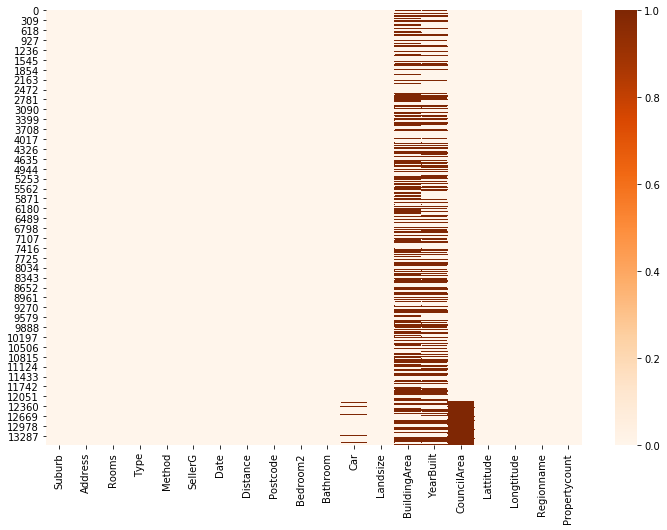

In [5]:
# Visualize null value
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
nan = df.isnull()
sns.heatmap(nan, cmap="Oranges")
plt.show();

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
null_cols = ["Car", "BuildingArea", "YearBuilt", "CouncilArea"]
df[null_cols].dtypes

Car             float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
dtype: object

In [8]:
null_cols = ["Car", "BuildingArea", "YearBuilt"]

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_array = imputer.fit_transform(df[null_cols])
new_df = pd.DataFrame(imp_array)
new_df.isnull().sum()

0    0
1    0
2    0
dtype: int64

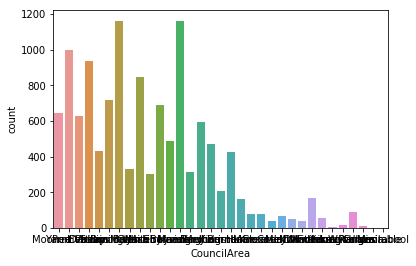

In [12]:
sns.countplot(x="CouncilArea", data=df)

In [13]:
df["CouncilArea"].fillna(value="New Category", inplace=True)
df["CouncilArea"].isnull().sum()

0

In [14]:
df.dropna(subset=["CouncilArea"], inplace=True)

In [15]:
df["CouncilArea"].isnull().sum()

0

# Outlier Detection

In [136]:
boston = load_boston()
X, y =boston.data, boston.target
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [139]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y =iris.data, iris.target
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

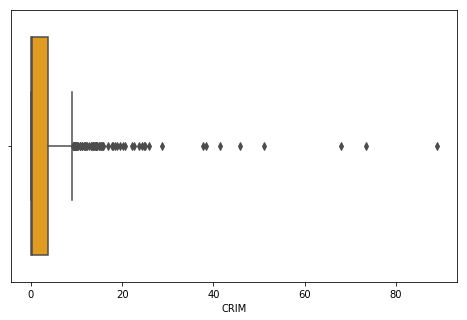

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["CRIM"], color="orange")
plt.show()

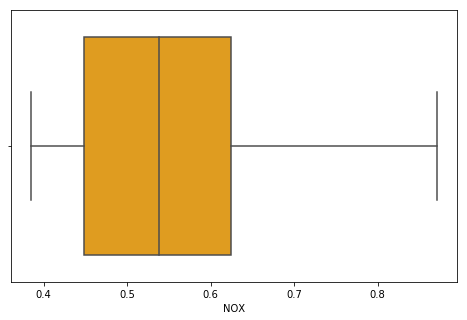

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["NOX"],  color="orange")
plt.show()

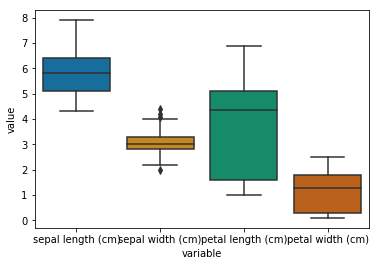

In [81]:
plt.figure(figsize=(6, 4))
sns.set_palette("colorblind")
sns.boxplot(x="variable", y="value", data=pd.melt(iris_df))
plt.show()

In [66]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [82]:
list(iris_df["sepal width (cm)"])

[3.5,
 3.0,
 3.2,
 3.1,
 3.6,
 3.9,
 3.4,
 3.4,
 2.9,
 3.1,
 3.7,
 3.4,
 3.0,
 3.0,
 4.0,
 4.4,
 3.9,
 3.5,
 3.8,
 3.8,
 3.4,
 3.7,
 3.6,
 3.3,
 3.4,
 3.0,
 3.4,
 3.5,
 3.4,
 3.2,
 3.1,
 3.4,
 4.1,
 4.2,
 3.1,
 3.2,
 3.5,
 3.6,
 3.0,
 3.4,
 3.5,
 2.3,
 3.2,
 3.5,
 3.8,
 3.0,
 3.8,
 3.2,
 3.7,
 3.3,
 3.2,
 3.2,
 3.1,
 2.3,
 2.8,
 2.8,
 3.3,
 2.4,
 2.9,
 2.7,
 2.0,
 3.0,
 2.2,
 2.9,
 2.9,
 3.1,
 3.0,
 2.7,
 2.2,
 2.5,
 3.2,
 2.8,
 2.5,
 2.8,
 2.9,
 3.0,
 2.8,
 3.0,
 2.9,
 2.6,
 2.4,
 2.4,
 2.7,
 2.7,
 3.0,
 3.4,
 3.1,
 2.3,
 3.0,
 2.5,
 2.6,
 3.0,
 2.6,
 2.3,
 2.7,
 3.0,
 2.9,
 2.9,
 2.5,
 2.8,
 3.3,
 2.7,
 3.0,
 2.9,
 3.0,
 3.0,
 2.5,
 2.9,
 2.5,
 3.6,
 3.2,
 2.7,
 3.0,
 2.5,
 2.8,
 3.2,
 3.0,
 3.8,
 2.6,
 2.2,
 3.2,
 2.8,
 2.8,
 2.7,
 3.3,
 3.2,
 2.8,
 3.0,
 2.8,
 3.0,
 2.8,
 3.8,
 2.8,
 2.8,
 2.6,
 3.0,
 3.4,
 3.1,
 3.0,
 3.1,
 3.1,
 3.1,
 2.7,
 3.2,
 3.3,
 3.0,
 2.5,
 3.0,
 3.4,
 3.0]

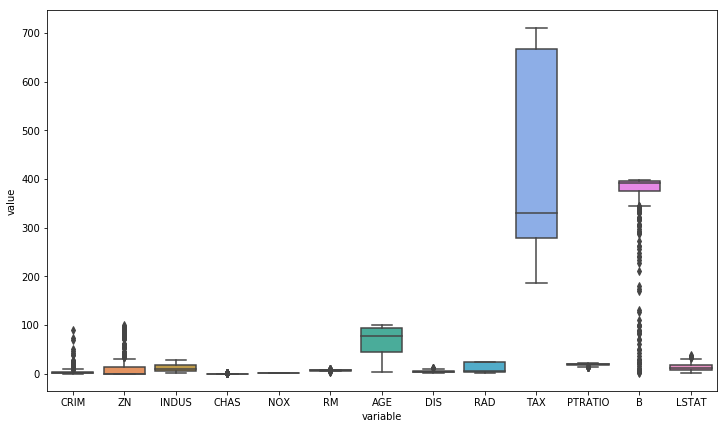

In [79]:
boston_df.astype(int)
plt.figure(figsize=(12, 7))
sns.set_palette("dark")
sns.boxplot(x="variable", y="value", data=pd.melt(boston_df))
plt.show()

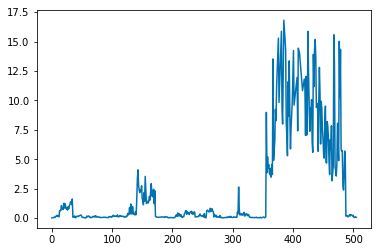

In [78]:
plt.plot(x)

# Convert Data Type

In [99]:
from sklearn.datasets import load_diabetes
wine = load_diabetes()
X, y = wine.data, wine.target
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [100]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


# Dummy

In [133]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(titanic["Embarked"])
labels

TypeError: unorderable types: float() < str()

In [126]:
#def convert_cat2num(titanic):
num_encode = {"Embarked": {"S": 0, "C": 1, "Q": 2}}
titanic.replace(num_encode, inplace=True)
titanic["Embarked"].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [127]:
titanic["Embarked"].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [ ]:
def convert_cat2num(titanic):
    # Convert categorical variable to numerical variable
    num_encode = {"Embarked" : {"S": 0, "C": 1, "Q": 2}
    titanic.replace(num_encode, inplace=True)

# Normalize data

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
# split in X and y
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [22]:
# split data for training and test
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


## MinMaxScaler() 0 - 1

In [ ]:
scaler = MinMaxScaler()
train_scaler = scaler.fit_transform(X_train)
test_scaler = scaler.fit_transform(Y_train)

In [ ]:
#fitting model
clf = LogisticRegression().fit(X, y)
clf_min_max=LogisticRegression().fit(train_minmax,X_test)
print(clf.score(Y_train,Y_test))
print(clf_min_max.score(Y_train,Y_test))

In [ ]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [16]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler().fit(data)
print(data)
print(scaler.transform(data))

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [ ]:
MinMaxScaler convert all value in the range of 0→1